In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

## 1. Prepare data

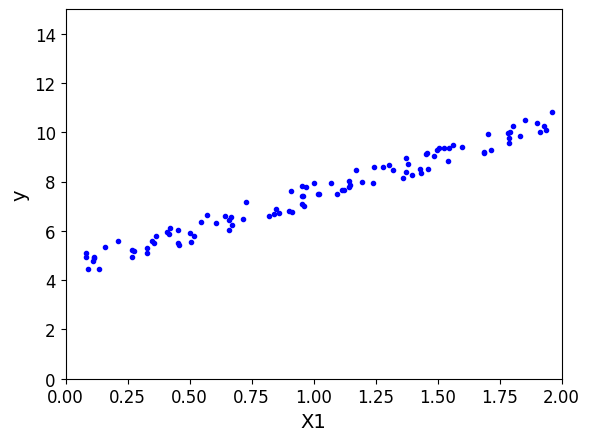

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
plt.plot(X, y, 'b.')
plt.xlabel('X1')
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

## 2. Use the characteristic equation to solve for w

In [3]:
X_b = np.c_[np.ones([100, 1]), X]
w_best = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y)
w_best

array([[4.4581363 ],
       [3.02825519]])

In [4]:
X_new = np.array([[0], [2]])
X_b_new = np.c_[np.ones([2, 1]), X_new]
y_pred = X_b_new.dot(w_best)
y_pred

array([[ 4.4581363 ],
       [10.51464669]])

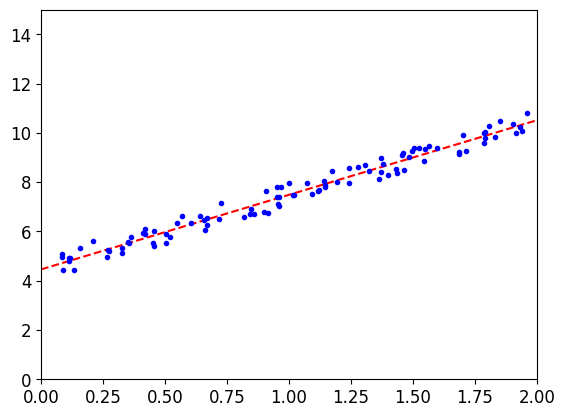

In [5]:
plt.plot(X_new, y_pred, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

## 3. Use scikit-learn to find best w

Common issues and techniques:
* Learning rate too small: the model is slow to converge
* Learning rate too large: unable to converge the minimum
* Stuck at the local minimum: random initialization for multiple experiments with lower learning rate
* Data scaling: tackle with different scope of values of variables, make gradient descent more smooth

In [6]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression()

In [7]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[[3.02825519]]
[4.4581363]


## 4. Explore gradient descent

### 4.1 Standardized gradient descent

In [8]:
w_path_bgd = []
def plot_gradient_descent(w, alpha, w_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_b_new.dot(w)
        plt.plot(X_new, y_predict, 'b-')
        gradients = 1 / m * X_b.T.dot(X_b.dot(w) - y)
        w = w - alpha * gradients
        if w_path is not None:
            w_path.append(w)
    plt.xlabel('X_1')
    plt.axis([0, 2, 0, 15])
    plt.title('Learning rate = {}'.format(alpha))

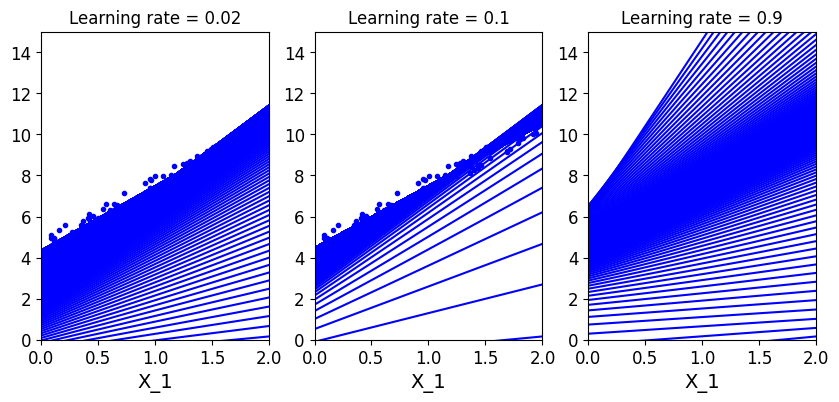

In [9]:
w = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(w, alpha = 0.02)
plt.subplot(132)
plot_gradient_descent(w, alpha = 0.1, w_path=w_path_bgd)
plt.subplot(133)
plot_gradient_descent(w, alpha = 0.9)
plt.show()


Successfully get the desired value

In [10]:
w

array([[-0.8898568 ],
       [ 0.52470704]])

In [11]:
plt.show()

### 4.2 SGD

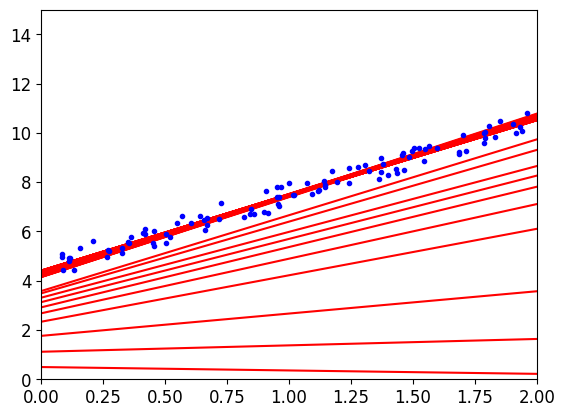

In [12]:
w_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50

t0 = 5
t1 = 50

# Keep decreasing the learning rate
def learning_schedule(t):
    return t0 / (t1 + t)

w = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i < 10:
            y_predict = X_b_new.dot(w)
            plt.plot(X_new, y_predict, 'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        
        # Here m = 1, thus gradient = 1 / m ... = 1 * ...
        gradients = xi.T.dot(xi.dot(w) - yi)
        alpha = learning_schedule(epoch * m + i)
        w = w - alpha * gradients
        w_path_sgd.append(w)
        
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])   
plt.show()

### 4.3 Minibatch

In [13]:
w_path_mgd=[]
n_epochs = 50
minibatch = 16
w = np.random.randn(2,1)
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
t = 0
for epoch in range(n_epochs):
    # Shuffle to data so that the minibatches chosen are different
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch):
        t += 1
        xi = X_b_shuffled[i : i + minibatch]
        yi = y_shuffled[i : i + minibatch]
        
        # Important: divide minibatch here
        gradients = 1 / minibatch * xi.T.dot(xi.dot(w) - yi)
        alpha = learning_schedule(t)
        w = w - alpha * gradients
        w_path_mgd.append(w)

In [14]:
w

array([[4.45768954],
       [3.0281734 ]])

### 4.4 Compare three gradient strategies

In [15]:
w_path_bgd = np.array(w_path_bgd)
w_path_sgd = np.array(w_path_sgd)
w_path_mgd = np.array(w_path_mgd)

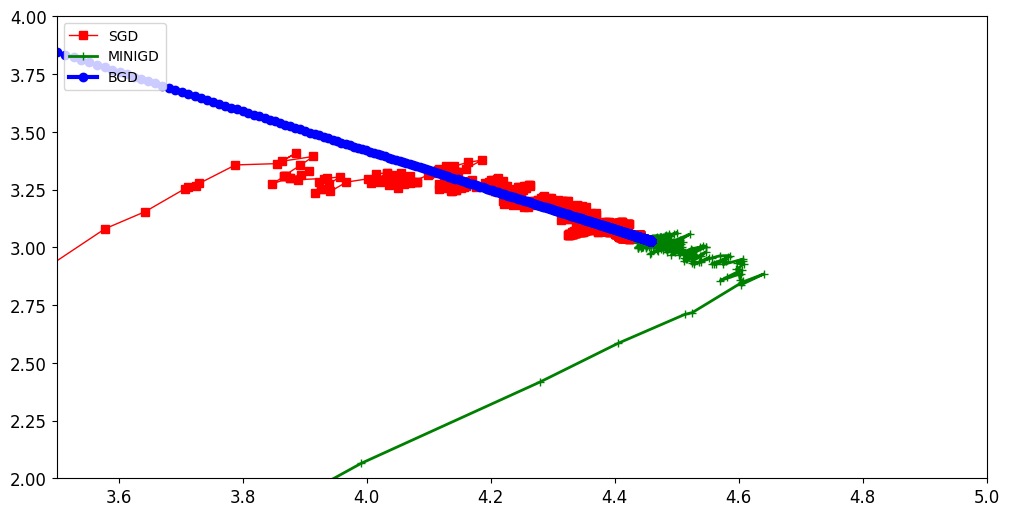

In [20]:
plt.figure(figsize=(12,6))
plt.plot(w_path_sgd[:,0], w_path_sgd[:,1],'r-s',linewidth=1,label='SGD')
plt.plot(w_path_mgd[:,0], w_path_mgd[:,1],'g-+',linewidth=2,label='MINIGD')
plt.plot(w_path_bgd[:,0], w_path_bgd[:,1],'b-o',linewidth=3,label='BGD')
plt.legend(loc='upper left')
plt.axis([3.5,5,2.0,4.0])
plt.show()

## 5. Polynomial regression

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + np.random.randn(m, 1)

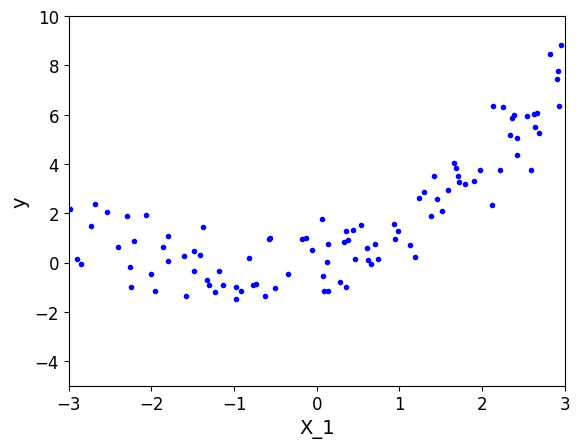

In [22]:
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3,3,-5,10])
plt.show()

In [26]:
# Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0], X[0] ** 2

(array([2.38942838]), array([2.38942838, 5.709368  ]), array([5.709368]))

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.95038538 0.52577032]]
[-0.0264767]


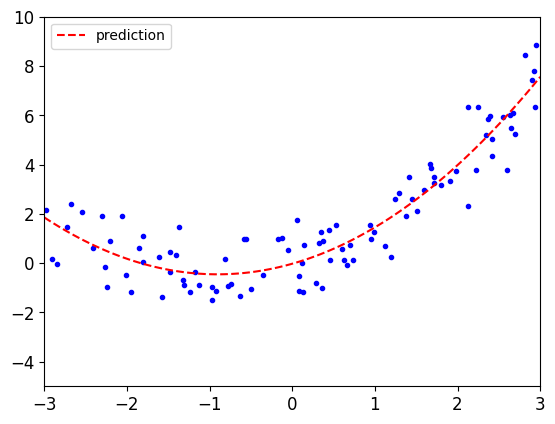

In [28]:
# Do some predictions
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r--',label='prediction')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

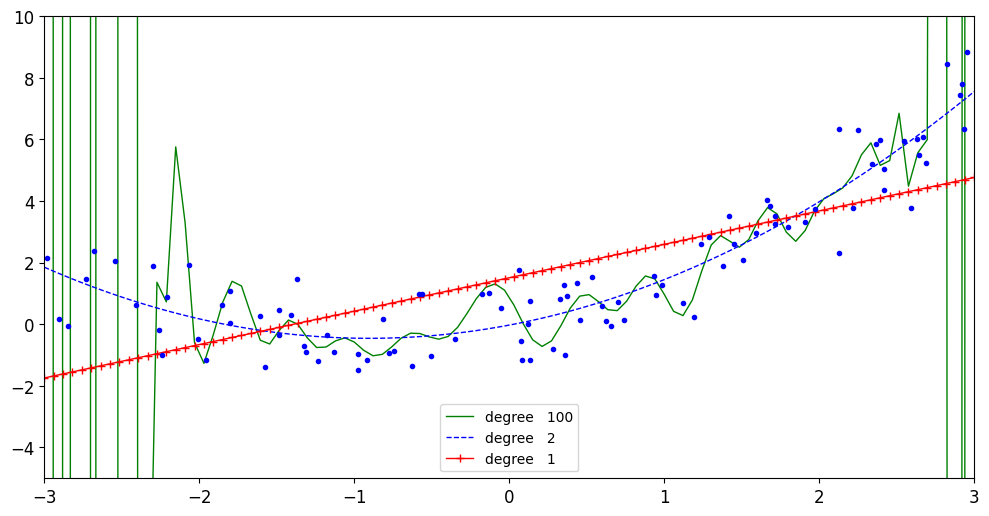

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12, 6))

for style, width, degree in (('g-', 1, 100), ('b--', 1, 2), ('r-+', 1, 1)):
    poly_features = PolynomialFeatures(degree = degree,include_bias = False)
    std = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_reg = Pipeline([('poly_features',poly_features),
             ('StandardScaler',std),
             ('lin_reg',lin_reg)])
    polynomial_reg.fit(X,y)
    y_new_2 = polynomial_reg.predict(X_new)
    plt.plot(X_new,y_new_2,style,label = 'degree   '+str(degree),linewidth = width)

plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.legend()
plt.show()

We can see that with higher polynomial degree, the risk of overfitting is higher.

## 6. Evaluate No. samples' effect

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=100)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train_error')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val_error')
    plt.xlabel('Trainsing set size')
    plt.ylabel('RMSE')
    plt.legend()

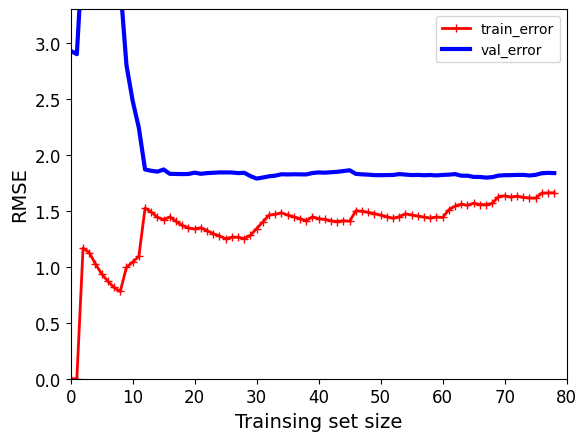

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,80, 0, 3.3])
plt.show()

Though a small training set produces low training loss, it produces high test loss. So, we should choose wisely the size of the training set.

## 7. Regularization

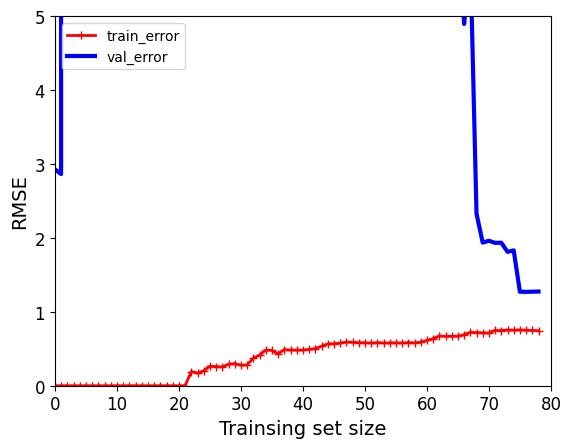

In [37]:
polynomial_reg = Pipeline([('poly_features',
                            PolynomialFeatures(degree=25, include_bias=False)),
                           ('lin_reg', LinearRegression())])
plot_learning_curves(polynomial_reg,X,y)
plt.axis([0, 80, 0, 5])
plt.show()

### 7.1 Ridge 

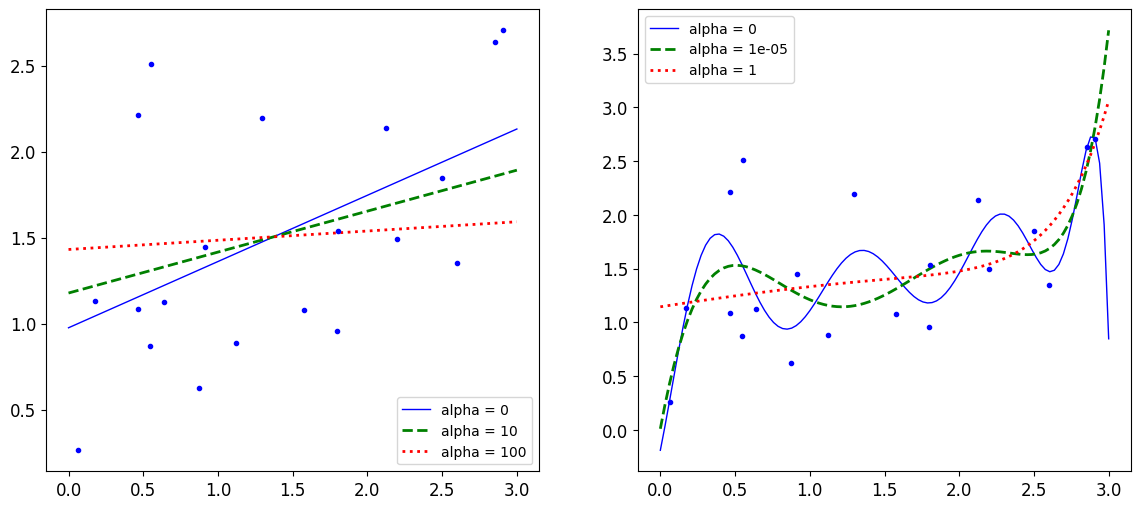

In [38]:
from sklearn.linear_model import Ridge
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 0.5 * X + np.random.randn(m, 1) / 1.5 + 1
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas,('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs)
        if polynomial:
            model = Pipeline([('poly_features',PolynomialFeatures(degree =10,include_bias = False)),
             ('StandardScaler',StandardScaler()),
             ('lin_reg',model)])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth = lw,label = 'alpha = {}'.format(alpha))
    plt.plot(X,y,'b.',linewidth =3)
    plt.legend()

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas = (0,10,100))
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas = (0,10**-5,1))
plt.show()

### 7.2 Lasso

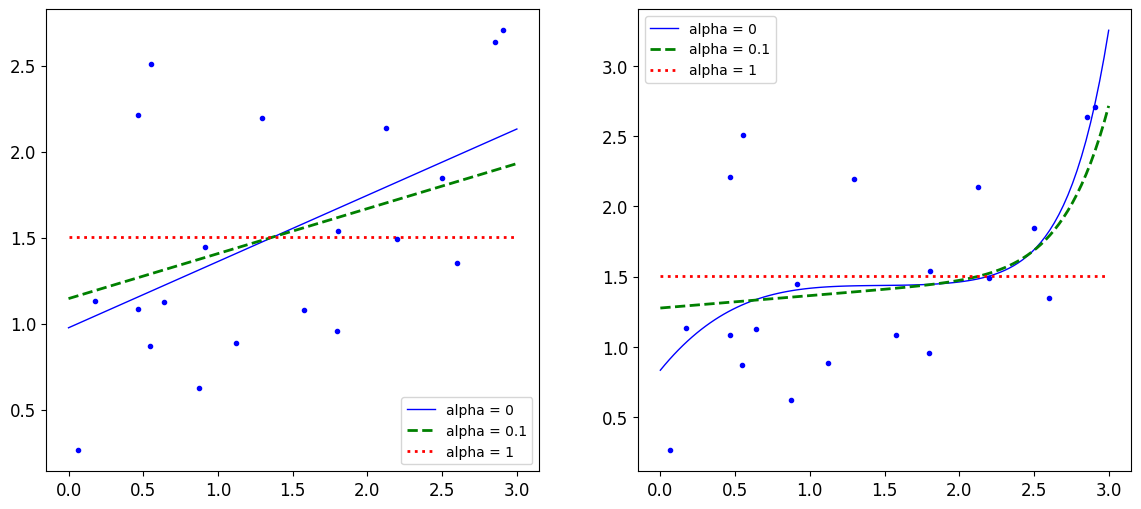

In [39]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(14,6))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas = (0,0.1,1))
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas = (0,10**-1,1))
plt.show()